<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/LogisticRegression/LogisticRegressionUsingSigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [272]:
from sklearn.datasets import make_blobs
import numpy as np
x, y = make_blobs(
    n_samples=100,
    centers=[(2, 2), (6, 2)],
    n_features=2,
    cluster_std=0.75,
    random_state=42)

In [273]:
x.shape

(100, 2)

In [274]:
import matplotlib.pyplot as plt

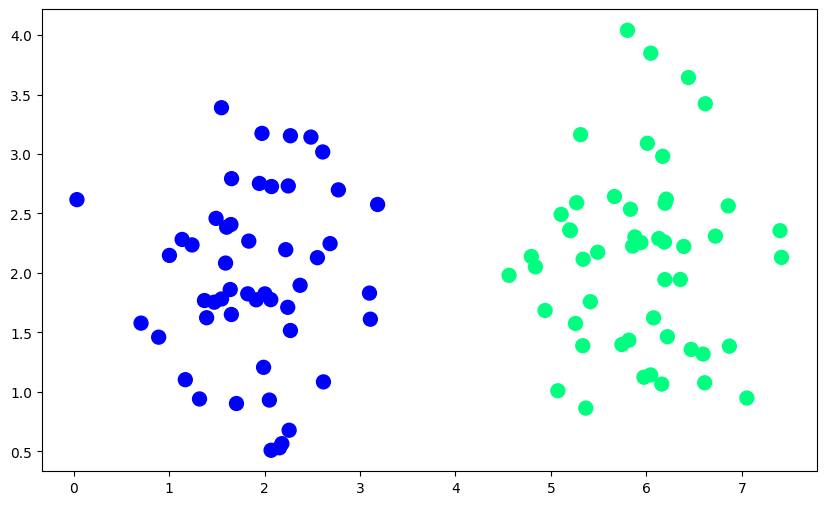

In [275]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='winter', s=100)

In [276]:
def step(z):
  return 1 if z>0 else 0

In [277]:
def perceptron(x, y):
  learning_rate = 0.1
  x_bias = np.insert(x, 0, 1, axis=1)

  weights = np.ones(x_bias.shape[1])
  for i in range(1000):
    j = np.random.randint(0, 100)
    y_hat = step(np.dot(x_bias[j], weights))
    weights = weights + learning_rate*(y[j] - y_hat) * x_bias[j]

  return weights

In [278]:
weights = perceptron(x, y)

In [279]:
intercept_ = weights[0]
coef_ = weights[1:]

In [280]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

In [281]:
x_input = np.linspace(x[:, 0].min() -1, x[:, 0].max() + 1, 100)
y_input = m * x_input + b

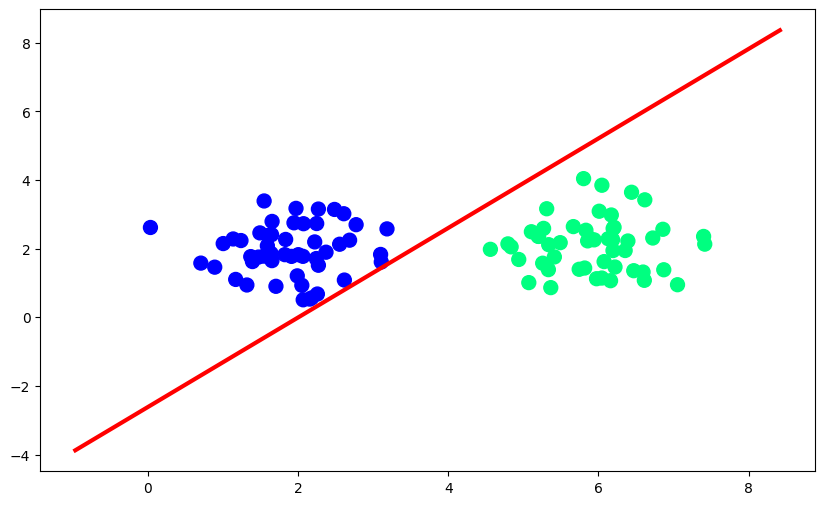

In [282]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(x[:, 0], x[:, 1],c=y, cmap='winter', s=100)

In [283]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x, y)

LogisticRegression()

In [284]:
m_new = -(lor.coef_[0][0] / lor.coef_[0][1])
b_new = -(lor.intercept_.item() / lor.coef_[0][1])

In [285]:
x_input1 = np.linspace(x[:, 0].min() -1, x[:, 0].max() + 1, 100)
y_input1 = m_new * x_input1 + b_new

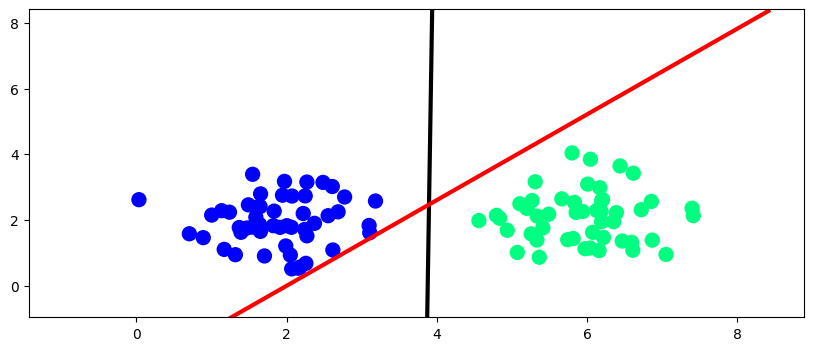

In [286]:
plt.figure(figsize=(10, 4))
plt.plot(x_input1, y_input1, color='black', linewidth=3)
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='winter', s=100)
plt.ylim(x[:, 0].min() - 1, x[:, 0].max() + 1)

plt.show()

In [287]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [288]:
def perceptron(x, y):
  x_bias = np.insert(x, 0, 1, axis=1)
  weights = np.ones(x_bias.shape[1])
  learning_rate = 0.1

  for i in range(1000):
    j = np.random.randint(0, 100)
    y_hat = sigmoid(np.dot(x_bias[j], weights))
    weights = weights + learning_rate * (y[j] - y_hat) * x_bias[j]

  return weights

In [289]:
weights = perceptron(x, y)

In [290]:
intercept_ = weights[0]
coef_ = weights[1:]

In [291]:
m_sigmoid = -(coef_[0] / coef_[1])
b_sigmoid = -(intercept_ / coef_[1])

In [292]:
x_input2 = np.linspace(x[:, 0].min() - 1, x[:, 0].max() + 1, 100)
y_input2 = m_sigmoid * x_input2 + b_sigmoid

(-0.9648088280673082, 8.414639425907897)

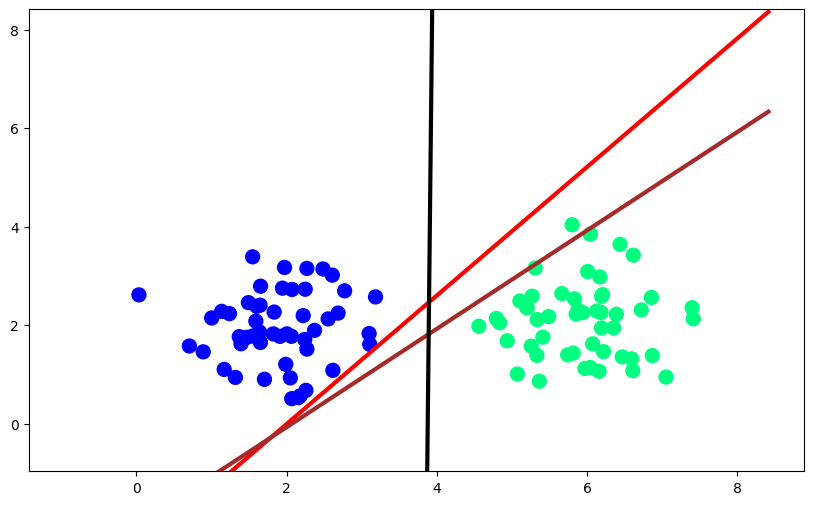

In [293]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.plot(x_input2, y_input2, color='brown', linewidth=3)
plt.plot(x_input1, y_input1, color='black', linewidth=3)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='winter', s=100)
plt.ylim(x[:, 0].min()-1, x[:, 0].max()+1)